### Kaggle Competition for House Prices : Advanced Regression Techniques

In [346]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [347]:
df = pd.read_csv('train.csv')

In [348]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [349]:
df.shape

(1460, 81)

<AxesSubplot:>

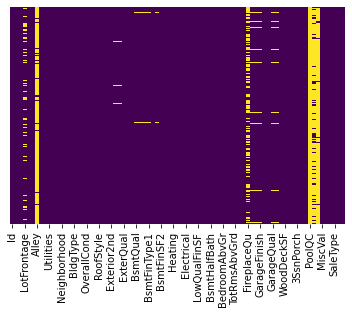

In [350]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [351]:
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [352]:
## Dropping the Features which is having more than 50 % missing values
df1 = df.copy()
df1.isnull().mean().sort_values(ascending=False).nlargest(5)
df1.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [353]:
df['LotFrontage'].dropna().sample(df['LotFrontage'].isnull().sum(), random_state=0)

242      63.0
400      38.0
54       60.0
316      94.0
748      59.0
627      80.0
228      70.0
1197     65.0
1343     57.0
1278     75.0
380      50.0
1325     40.0
371      80.0
479      50.0
439      67.0
533      50.0
1172     35.0
250      55.0
61       60.0
1275     95.0
1156     85.0
1188     68.0
1292     60.0
1291     21.0
1189     60.0
47       84.0
896      50.0
247      75.0
1042     34.0
1389     60.0
5        85.0
22       75.0
998      60.0
749      50.0
698      65.0
1372     75.0
271      73.0
1134     57.0
979      80.0
507      75.0
1444     63.0
226      82.0
633      80.0
150     120.0
819      44.0
637      50.0
368      78.0
1222     78.0
1313    108.0
829      24.0
832      44.0
1248     60.0
1344     85.0
989      65.0
1218     52.0
1349     50.0
9        50.0
357      44.0
708      65.0
1162    109.0
18       66.0
520      60.0
417      86.0
761      60.0
1303     73.0
662     120.0
674      80.0
800      79.0
949      78.0
1256     91.0
576      52.0
1071  

In [354]:
df1[df1['LotFrontage'].isnull()].index

Int64Index([   7,   12,   14,   16,   24,   31,   42,   43,   50,   64,
            ...
            1407, 1417, 1419, 1423, 1424, 1429, 1431, 1441, 1443, 1446],
           dtype='int64', length=259)

C:\Users\91951\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage'>

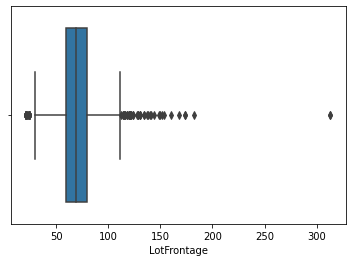

In [355]:
## Checking this Feature having Outliers or not
sns.boxplot(df1.LotFrontage)

In [356]:
## we are going to create a fuction which will create 2 more feature using current feature+median and feature_random
def impute_nan(df1, feature):
    df2[feature+'_median'] = df2[feature].fillna(df2[feature].median())
    df2[feature+'_random'] = df2[feature]
    ## It will have the random sample to fill the na
    random_sample = df2[feature].dropna().sample(df2[feature].isnull().sum(), random_state=0)
    ## Pandas needs to have some index in order to merge the dataset
    random_sample.index = df2[df2[feature].isnull()].index
    df2.loc[df2[feature].isnull(), feature+'_random'] = random_sample

In [357]:
df2 = df1.copy()
impute_nan(df2,'LotFrontage')

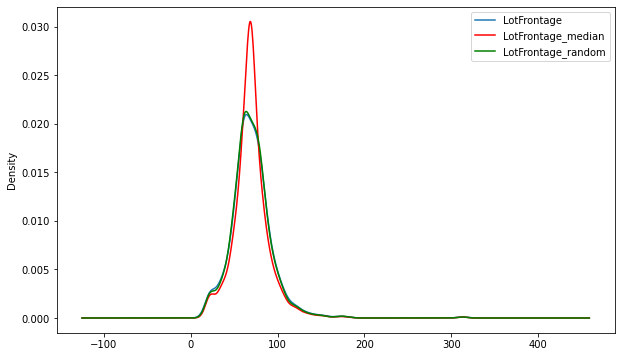

In [358]:
figure = plt.figure(figsize=(10, 6))
ax = figure.add_subplot(111)
df2['LotFrontage'].plot(kind='kde', ax=ax)
df2['LotFrontage_median'].plot(kind='kde', ax=ax, color='red')
df2['LotFrontage_random'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

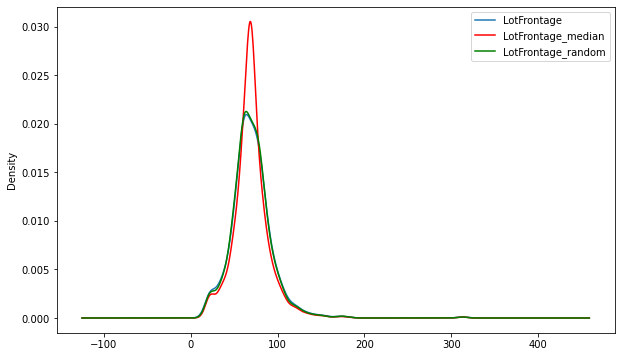

In [359]:
figure = plt.figure(figsize=(10, 6))
ax = figure.add_subplot(111)
df2['LotFrontage'].plot(kind='kde', ax=ax)
df2['LotFrontage_median'].plot(kind='kde', ax=ax, color='red')
df2['LotFrontage_random'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [360]:
## Filling the LotFrontage with Random Sample Imputation method
random_sample = df1["LotFrontage"].dropna().sample(df1['LotFrontage'].isnull().sum(), random_state=0)
random_sample.index = df1[df1['LotFrontage'].isnull()].index
df1.loc[df1['LotFrontage'].isnull(), 'LotFrontage'] = random_sample

In [361]:
## Filling the MasVnrType feature with mode value
df1.MasVnrType.fillna(df1.MasVnrType.mode()[0], inplace=True)

<AxesSubplot:>

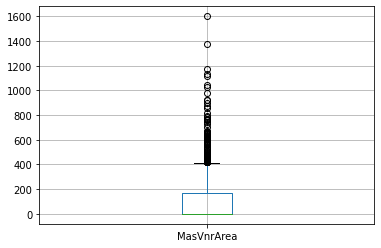

In [362]:
df1.boxplot('MasVnrArea')

In [363]:
### Filling the MasVnrArea feature with mode value
df1.MasVnrArea.fillna(df1.MasVnrArea.median(), inplace=True)

In [364]:
## Filling the missing values of BsmtQual Feature with mode value
df1.BsmtQual.fillna(df1.BsmtQual.mode()[0], inplace=True)

In [365]:
## Filling the missing values of BsmtCond Feature with mode value
df1.BsmtCond.fillna(df1.BsmtCond.mode()[0], inplace=True)

In [366]:
## Filling the missing valaues of BsmtExposure feature with mode value
df1.BsmtExposure.fillna(df1.BsmtExposure.mode()[0], inplace=True)

In [367]:
### Filiing he missing values of BsmtFinTpe1 feature with mode value
df1.BsmtFinType1.fillna(df1.BsmtFinType1.mode()[0], inplace=True)

In [368]:
### Filling the missing values of BsmtFintype2 featdure with mode value
df1.BsmtFinType2.fillna(df1.BsmtFinType2.mode()[0], inplace=True)

In [369]:
## Filling the missing value with mode
df1.GarageType.fillna(df1.GarageType.mode()[0], inplace=True)

<AxesSubplot:>

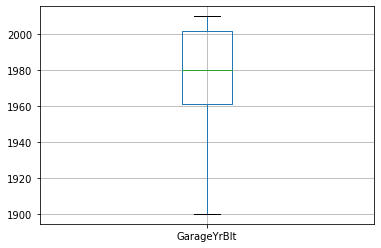

In [370]:
df1.boxplot('GarageYrBlt')

In [371]:
### Filling the missing value with mean
df1.GarageYrBlt.fillna(df1.GarageYrBlt.mean(), inplace=True)

In [372]:
## Filling the missing value with mode
df1.GarageFinish.fillna(df1.GarageFinish.mode()[0], inplace=True)

In [373]:
## This is only for Training Data
df1.Electrical.fillna(df2.Electrical.mode()[0], inplace=True)

In [374]:
df1.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


In [375]:
## We are Going to fill the missing value using mode
df1.GarageQual.fillna(df1.GarageQual.mode()[0], inplace=True)

In [376]:
## here wer are filling the missing value using mode
df1.GarageCond.fillna(df1.GarageCond.mode()[0], inplace=True)

In [377]:
main_df = df1.copy()

In [378]:
## Combine Test Data with Train Data because some of the categories in test data differece from train data 
test_df = pd.read_csv('formulatedtest.csv')

In [379]:
test_df.shape

(1459, 75)

In [380]:
main_df.shape

(1460, 76)

In [381]:
## This code is for combining train and test data row wise
comb_df = pd.concat([main_df, test_df], axis=0)

In [382]:
comb_df.shape

(2919, 76)

In [383]:
## Removing the ID column which is not required 
comb_df.drop(['Id'], axis=1, inplace=True)

In [384]:
### Finding The categorical Features
categoricals = [feature for feature in comb_df.columns if comb_df[feature].dtypes=='O']

In [385]:
len(categoricals)

38

In [386]:
## categorical features which is having more than 25 unique Categories
more_unique_cats = [feature for feature in categoricals if len(comb_df[feature].value_counts()) > 25]

In [387]:
len(more_unique_cats)

0

In [388]:
comb_df[categoricals].head(20)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal


In [389]:
comb_df.Condition1.value_counts()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

In [390]:
comb_df.BldgType.value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [391]:
comb_df.HouseStyle.value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [392]:
comb_df.GarageCond.value_counts()

TA    2813
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [393]:
comb_df.SaleType.value_counts()

WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [394]:
Numericals = [feature for feature in comb_df.columns if comb_df[feature].dtype!='O' and feature != "SalePrice"]

In [395]:
year_feature = [feature for feature in Numericals if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [396]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    comb_df[feature] = comb_df['YrSold']-comb_df[feature]

In [397]:
comb_df[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [398]:
import scipy.stats as stat
import pylab

# Gaussian Transformations

In [399]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

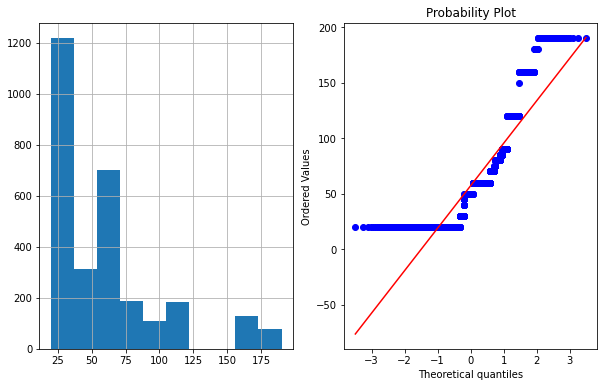

In [400]:
plot_data(comb_df, 'MSSubClass')

In [401]:
## Copy data for Guassian Transformation checking
trans_df = comb_df.copy()

In [402]:
## Box Cox transformation of mssubclass
comb_df['MSSubClass'], parameters = stat.boxcox(comb_df['MSSubClass'])

In [403]:
### square root Transformation for LotFrontage
comb_df['LotFrontage']=comb_df['LotFrontage']**(1/2)

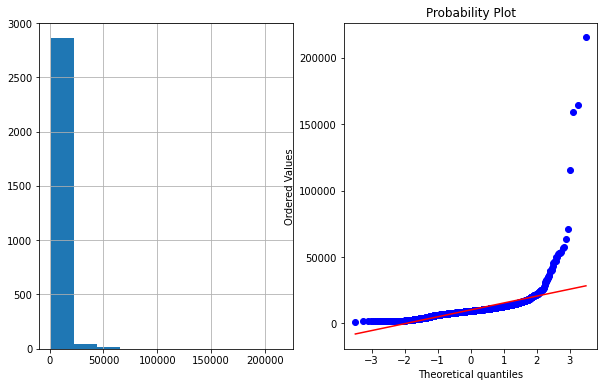

In [404]:
plot_data(comb_df, 'LotArea')

In [405]:
### Box Transformation for LotArea
comb_df['LotArea'], parameters = stat.boxcox(comb_df['LotArea'])

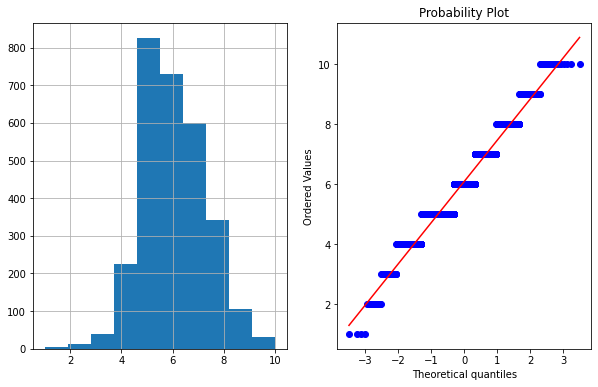

In [406]:
plot_data(comb_df, 'OverallQual')

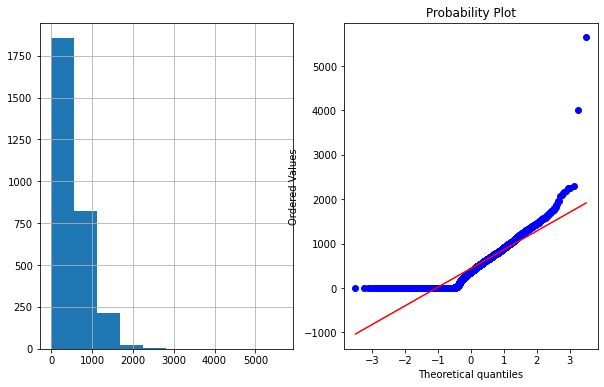

In [407]:
plot_data(comb_df, 'BsmtFinSF1')

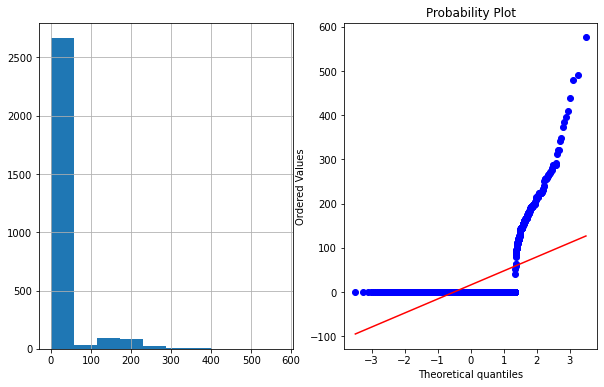

In [408]:
plot_data(comb_df, 'ScreenPorch')

In [409]:
### square root Transformation
comb_df['MasVnrArea']=comb_df['MasVnrArea']**(1/2)

In [410]:
### square root Transformation
comb_df['BsmtFinSF1']=comb_df['BsmtFinSF1']**(1/2)

In [411]:
comb_df['BsmtUnfSF']=comb_df['BsmtUnfSF']**(1/2)

In [412]:
### square root Transformation
comb_df['1stFlrSF']=comb_df['1stFlrSF']**(1/2)

In [413]:
#Logtransformation
comb_df['GrLivArea'] = np.log(comb_df['GrLivArea'])

In [414]:
### square root Transformation
comb_df['WoodDeckSF']=comb_df['WoodDeckSF']**(1/2)

In [415]:
### square root Transformation
comb_df['OpenPorchSF']=comb_df['OpenPorchSF']**(1/2)

In [416]:
stand_df = comb_df.copy()

In [417]:
comb_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2.743805,RL,8.062258,17.233406,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,14.000000,Gd,TA,PConc,Gd,TA,No,GLQ,26.570661,Unf,0.0,12.247449,856.0,GasA,Ex,Y,SBrkr,29.257478,854,0,7.444249,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0.000000,7.810250,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2.221832,RL,8.944272,17.650449,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,31.272992,Unf,0.0,16.852300,1262.0,GasA,Ex,Y,SBrkr,35.524639,0,0,7.140453,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,17.262677,0.000000,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,2.743805,RL,8.246211,18.178584,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,12.727922,Gd,TA,PConc,Gd,TA,Mn,GLQ,22.045408,Unf,0.0,20.832667,920.0,GasA,Ex,Y,SBrkr,30.331502,866,0,7.487734,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0.000000,6.480741,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,2.807856,RL,7.745967,17.633246,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,14.696938,Unf,0.0,23.237900,756.0,GasA,Gd,Y,SBrkr,31.000000,756,0,7.448334,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0.000000,5.916080,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,2.743805,RL,9.165151,18.988661,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,18.708287,Gd,TA,PConc,Gd,TA,Av,GLQ,25.592968,Unf,0.0,22.135944,1145.0,GasA,Ex,Y,SBrkr,33.837849,1053,0,7.695303,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,13.856406,9.165151,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [418]:
stand_df = pd.get_dummies(stand_df, drop_first=True)

In [419]:
stand_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.743805,8.062258,17.233406,7,5,5,5,14.000000,26.570661,0.0,12.247449,856.0,29.257478,854,0,7.444249,1.0,0.0,2,1,3,1,8,0,5.0,2.0,548.0,0.000000,7.810250,0,0,0,0,0,2,2008,208500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,

In [420]:
stand_df.shape

(2919, 233)

In [421]:
stand_df = stand_df.loc[:, ~stand_df.columns.duplicated()]

In [422]:
stand_df.shape

(2919, 233)

In [423]:
final_train = stand_df.iloc[:1460, :]
final_test = stand_df.iloc[1460:, :]

In [424]:
final_train.shape

(1460, 233)

In [425]:
final_test.shape

(1459, 233)

In [426]:
final_test.to_csv('Final_test', index=False)

In [427]:
final_test=final_test.drop('SalePrice', axis=1)

In [428]:
final_train.shape

(1460, 233)

In [429]:
final_test.shape

(1459, 232)

In [430]:
df2 = final_train.copy()
correlated_features = set()
correlation_matrix = df2.drop('SalePrice', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [431]:
correlated_features

{'1stFlrSF',
 'BsmtFinType1_Unf',
 'BsmtQual_TA',
 'ExterCond_TA',
 'ExterQual_TA',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'GarageArea',
 'GarageCond_TA',
 'GarageQual_TA',
 'GarageType_Detchd',
 'HouseStyle_2Story',
 'KitchenQual_TA',
 'MSZoning_RM',
 'MasVnrType_None',
 'Neighborhood_Somerst',
 'RoofStyle_Hip',
 'SaleCondition_Partial',
 'TotRmsAbvGrd'}

In [432]:
#### Deleting the features which is having more than 80 % Correlation
df2.drop(correlated_features, axis=1, inplace=True)

In [433]:
x = df2.drop('SalePrice', axis=1)
y = df2['SalePrice']

In [434]:
final_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.221832,8.944272,18.288263,5,6,49,49,0.000000,21.633308,144.0,16.431677,882.0,29.933259,0,0,6.797940,0.0,0.0,1,0,2,1,5,0,49.0,1.0,730.0,11.832160,0.000000,0,0,120,0,0,6,2010,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,

In [435]:
df2.shape

(1460, 210)

In [436]:
## deleting the correlated features in test Data also
final_test = final_test.drop(correlated_features, axis=1)

In [437]:
from sklearn.decomposition import PCA

In [438]:
pca = PCA(n_components=2).fit_transform(x, y)

In [439]:
pca.shape

(1460, 2)

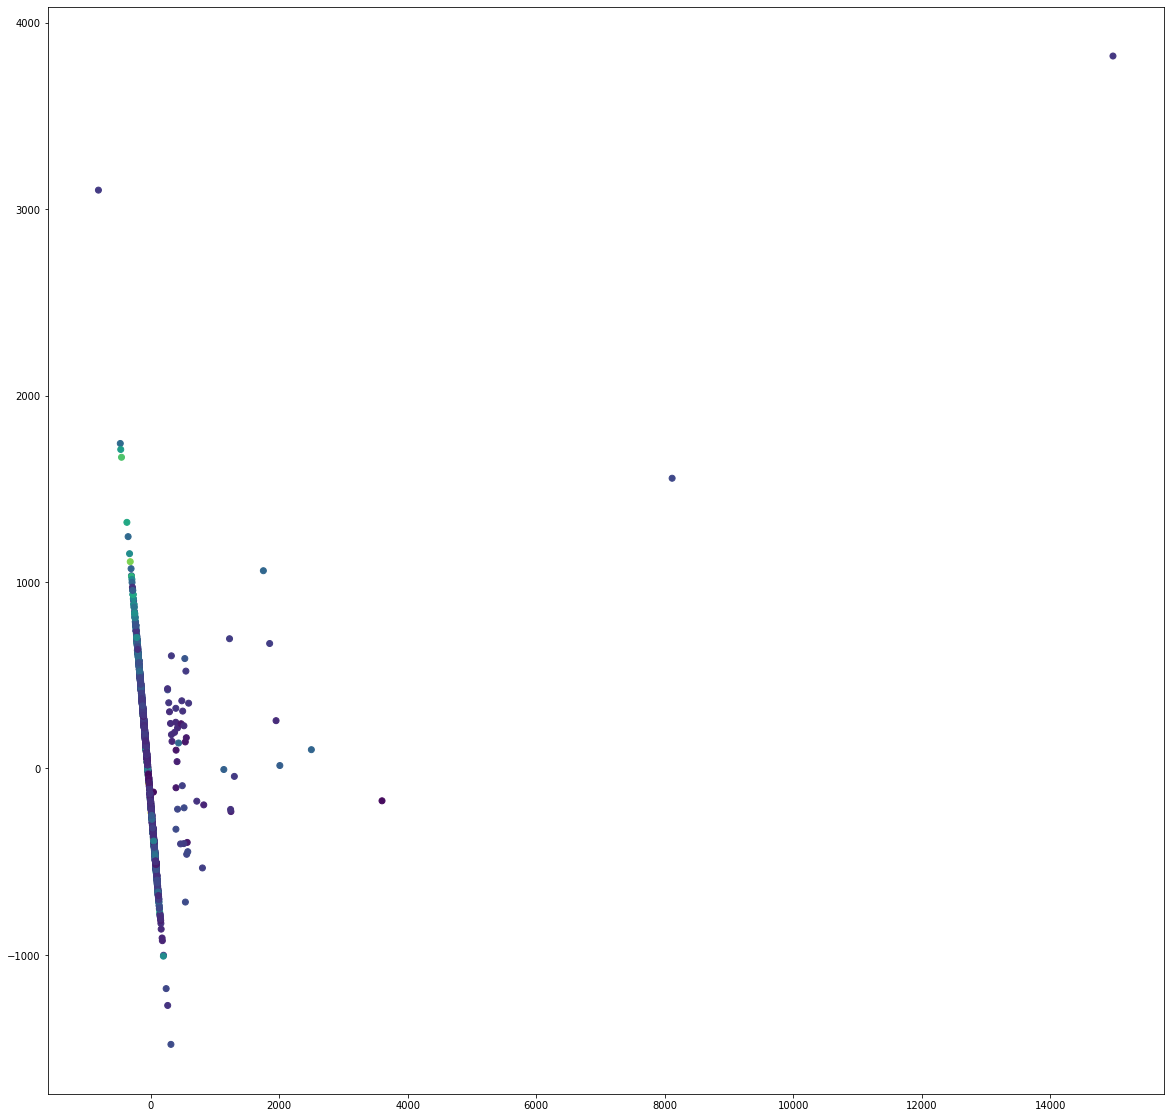

In [440]:
plt.figure(figsize=(20, 20))
plt.scatter(pca[:, 0], pca[:, 1], c=final_train['SalePrice'])
plt.show()

In [441]:
from xgboost import XGBRegressor
reg = XGBRegressor().fit(x, y)

In [442]:
y_pred = reg.predict(final_test)

In [443]:
y_pred

array([121632.37, 153732.16, 197395.9 , ..., 167219.88, 116208.78,
       211020.27], dtype=float32)

In [454]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [455]:
x_train.shape

(1168, 209)

In [456]:
y_train.shape

(1168,)

In [457]:
reg1 = XGBRegressor()

In [458]:
reg1.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [461]:
y_predict = reg1.predict(x_test)

In [463]:
from sklearn.metrics import r2_score
scores = r2_score(y_test, y_predict)

In [464]:
### This is the R2 Scor for model
scores

0.8770474957537929